In [2]:
from pathlib import Path
import pandas as pd

# 1. Point to your repo root
ROOT = Path(r"C:\Users\miga\Documents\GitHub\Project_EDSB")

# 2. Candidate locations for the merged dataset
candidates = [
    ROOT / "data2" / "processed" / "telco_merged_step1.csv",
    ROOT / "data" / "processed" / "telco_merged_step1.csv",
]

print("Checking candidate paths:")
for p in candidates:
    print(" ", p, "-> exists:", p.exists())

# 3. Pick the first one that actually exists
csv_path = None
for p in candidates:
    if p.exists():
        csv_path = p
        break

if csv_path is None:
    raise FileNotFoundError(
        "Could not find 'telco_merged_step1.csv' in either data2/processed or data/processed."
    )

print("\nUsing CSV path:", csv_path)

# 4. Load the merged file
df = pd.read_csv(csv_path)
print(df.shape)
df.head()



Checking candidate paths:
  C:\Users\miga\Documents\GitHub\Project_EDSB\data2\processed\telco_merged_step1.csv -> exists: False
  C:\Users\miga\Documents\GitHub\Project_EDSB\data\processed\telco_merged_step1.csv -> exists: True

Using CSV path: C:\Users\miga\Documents\GitHub\Project_EDSB\data\processed\telco_merged_step1.csv
(7043, 52)


,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,state,...,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population_x,population_y
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,68701,68701
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,California,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,55668,55668
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,California,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,47534,47534
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,27778,27778
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,67,2793,Price,Extra data charges,26265,26265


In [4]:
churned = df[df["churn_value"] == 1]

cat_counts = (
    churned["churn_category"]
    .value_counts(normalize=True)
    .sort_values(ascending=False)
)

print(cat_counts)


churn_category
Competitor         0.449973
Attitude           0.168004
Dissatisfaction    0.162119
Price              0.112895
Other              0.107009
Name: proportion, dtype: float64


C:\Users\miga\AppData\Local\Temp\ipykernel_39072\798261636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


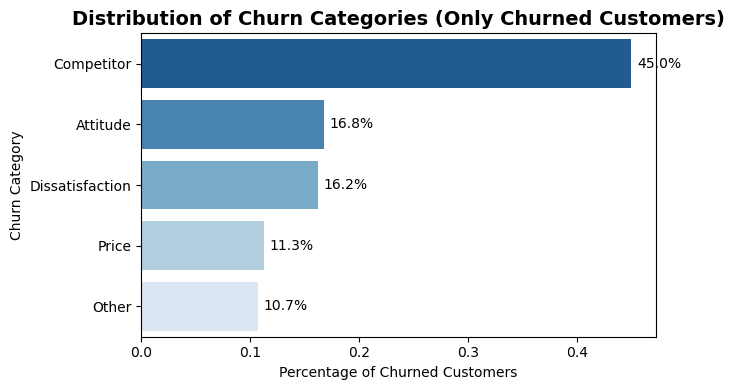

In [5]:
plt.figure(figsize=(7,4))
sns.barplot(
    x=cat_counts.values,
    y=cat_counts.index,
    palette="Blues_r"
)

plt.title("Distribution of Churn Categories (Only Churned Customers)", fontsize=14, weight="bold")
plt.xlabel("Percentage of Churned Customers")
plt.ylabel("Churn Category")

for i, v in enumerate(cat_counts.values):
    plt.text(v + 0.005, i, f"{v:.1%}", va="center")

plt.tight_layout()
plt.show()


In [7]:
competitor_df = df[(df["churn_value"] == 1) & (df["churn_category"] == "Competitor")]
competitor_df.head()


,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,state,...,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population_x,population_y
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,68701,68701
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,California,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,55668,55668
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,California,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,47534,47534
5,4412-YLTKF,1,Female,72,No,Yes,No,Yes,1,California,...,1,Churned,Yes,1,95,4638,Competitor,Competitor had better devices,63288,63288
11,9947-OTFQU,1,Male,65,No,Yes,No,No,0,California,...,1,Churned,Yes,1,86,4616,Competitor,Competitor had better devices,33817,33817


In [12]:
competitor_df = df[df["churn_category"] == "Competitor"].copy()


In [13]:
reason_pct = (
    competitor_df["churn_reason"]
    .value_counts(normalize=True)
    .head(10)
)
print(reason_pct)


churn_reason
Competitor had better devices                0.372176
Competitor made better offer                 0.369798
Competitor offered more data                 0.139120
Competitor offered higher download speeds    0.118906
Name: proportion, dtype: float64


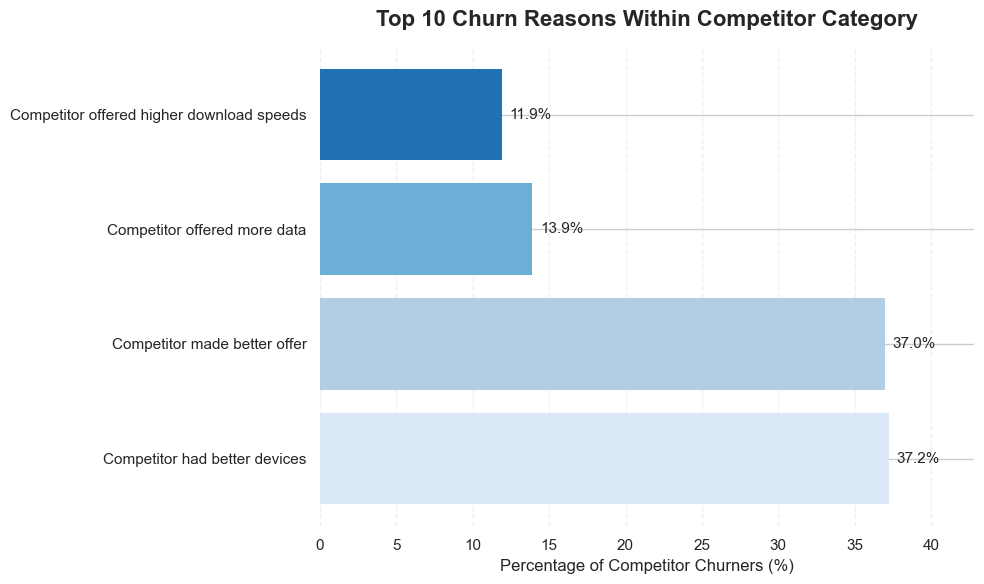

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

# Convert to %
values_pct = reason_pct.values * 100

# Colors (light → dark blue)
colors = ["#dbe9f6", "#b3cde3", "#6baed6", "#2171b5"] * 3
colors = colors[:len(reason_pct)]

bars = ax.barh(
    y=reason_pct.index,
    width=values_pct,
    color=colors,
    edgecolor="none"
)

# Title
ax.set_title(
    "Top 10 Churn Reasons Within Competitor Category",
    fontsize=16, weight="bold", pad=15
)

ax.set_xlabel("Percentage of Competitor Churners (%)", fontsize=12)
ax.set_ylabel("")

# Extend x-axis slightly
ax.set_xlim(0, values_pct.max() * 1.15)

# Add % labels
for bar, pct in zip(bars, values_pct):
    ax.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        ha="left",
        fontsize=11
    )

sns.despine(left=True, bottom=True)
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


## 74% of competitor churn is due to better devices or better offers” directly on the chart.